In [19]:
import pandas as pd
from pandas import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [4]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [6]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [7]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [16]:
univariate_column_label=['AEDAHO_T9_V2']
univariate_data_set=test_new.iloc[500:700][univariate_column_label] #just for checking whether it is working or not
print(univariate_data_set.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-11 11:33:00     42.305187
2019-04-11 11:32:00     42.480315
2019-04-11 11:31:00     42.343193
2019-04-11 11:30:00     42.108748
2019-04-11 11:29:00     42.292350


In [18]:
univariate_data=univariate_data_set.loc[::-1]
print(univariate_data.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-11 08:14:00     42.152661
2019-04-11 08:15:00     42.268855
2019-04-11 08:16:00     43.134080
2019-04-11 08:17:00     42.618975
2019-04-11 08:18:00     42.481211


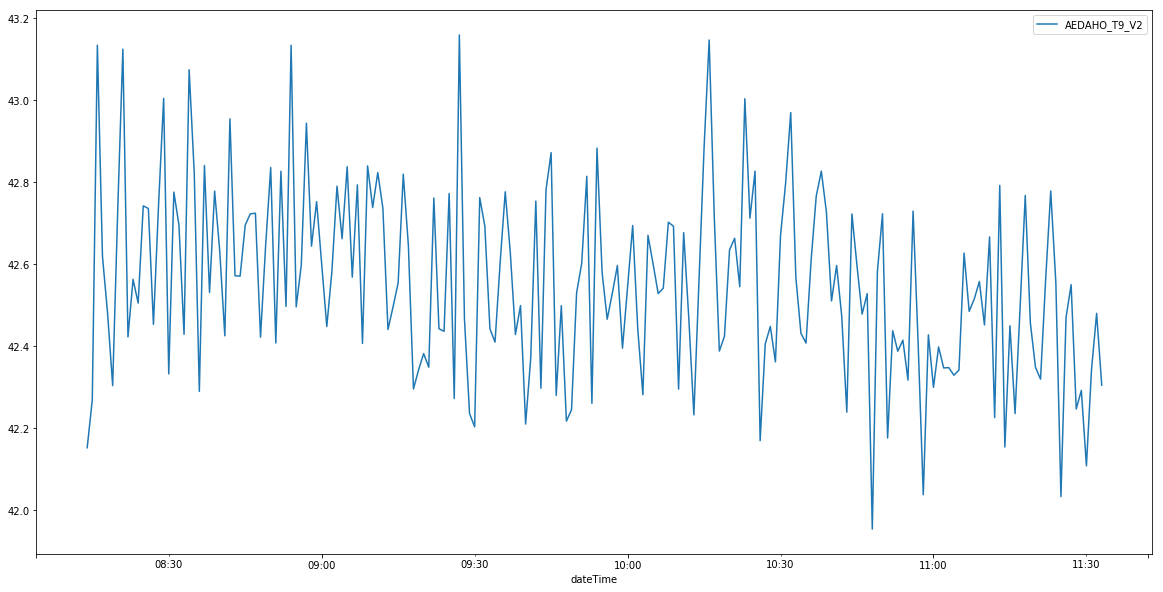

In [21]:
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()